# Exploratory Data Analysis (Airbnb Singapore)

Sumber Dataset : 
-  http://insideairbnb.com/get-the-data.html - Singapore - listings.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 16)

In [4]:
df = pd.read_csv("listings.csv")

#### Pengecekan Missing Value

In [9]:
df.isnull().sum() #Mengecek pada kolom mana saja terdapat value NaN

id                                   0
name                                 1
host_id                              0
host_name                           22
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2835
reviews_per_month                 2835
calculated_host_listings_count       0
availability_365                     0
dtype: int64

#### Handling Missing Value

In [8]:
df1 = df

In [10]:
#Pertama kita isi missing value pada kolom last_review dan reviews_per_month

df1[['last_review', 'reviews_per_month']] = df1[['last_review', 'reviews_per_month']].fillna(value=0)

#Lalu isi missing value pada kolom name dengan kata Unknown, kenapa kita isi unknown karena tidak mungkin nama suatu kamar kosong,
#Sehingga dianggap tidak diketahui

df1[['name']] = df1[['name']].fillna(value='Unknown')

#Terakhir adalah missing value pada kolom host_name, kemungkinan besar alasan terdapat missing value pada host_name adalah
#karena memang sengaja tidak ingin memberi tahu nama pemilik, sehingga kami isi dengan Classified

df1[['host_name']] = df1[['host_name']].fillna(value='Classified')

In [11]:
df1.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Describe Data

In [13]:
dataDesc = []

for i in df1.columns:
    dataDesc.append([
        i,
        df1[i].dtypes,
        df1[i].isnull().sum(),
        round((((df1[i].isnull().sum()) / (len(df1))) * 100), 2),
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

In [14]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,7323,"[16678046, 41868474]"
1,name,object,0,0.0,6767,[Entire Loft Storey. FREE WIFI. Near TRAIN/BUS...
2,host_id,int64,0,0.0,2466,"[52897090, 37284901]"
3,host_name,object,0,0.0,1740,"[Monalisa, L A]"
4,neighbourhood_group,object,0,0.0,5,"[West Region, North Region]"
5,neighbourhood,object,0,0.0,43,"[Pasir Ris, Serangoon]"
6,latitude,float64,0,0.0,4579,"[1.3119100000000001, 1.31351]"
7,longitude,float64,0,0.0,4974,"[103.83589, 103.82807]"
8,room_type,object,0,0.0,4,"[Entire home/apt, Shared room]"
9,price,int64,0,0.0,429,"[60, 384]"


#### Pengecekan Data Outliers Price (Hitungan Rumus)

In [17]:
Q1 = df1.describe()['price']['25%']
Q3 = df1.describe()['price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR) #WHISKER
Lower_Fence = Q1 - (1.5 * IQR) #WHISKER

In [18]:
df1[(df1['price'] < Lower_Fence) | (df1['price'] > Upper_Fence)].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
35,804470,Spacious Luxury Condo in Orchard,741873,Dara,Central Region,Tanglin,1.30292,103.82253,Entire home/apt,2620,1,1,2014-02-22,0.01,1,0
61,1434208,Appt 3R great vew on Marin baysand,7707838,Sophie,Central Region,River Valley,1.29211,103.83600,Entire home/apt,400,4,6,2015-01-01,0.07,1,0
81,1743439,Private room & sofa w/ a TV in a central locat...,9164793,Michelle,Central Region,Outram,1.28328,103.84532,Private room,799,1,3,2018-01-21,0.10,5,0
123,2387766,"City,(10~14pax)Entire Private Loft,Fast WIFI,C...",12067440,Tommy,Central Region,Kallang,1.31170,103.86028,Private room,500,1,16,2020-01-14,0.25,14,264
202,4013186,Cosy Room right in the City town.,20049904,Lenneth,Central Region,Outram,1.27641,103.84087,Private room,950,180,0,0,0.00,2,365


#### Penambahan Kolom Occupancy Rate

In [19]:
# Pertama kita buat suatu kolom occupancy rate yang menunjukkan occupancy rate atau tingkat ketersediaan.
# Tingkat ketersediaan dapat kita hitung berdasarkan kolom Availability_365, jika avalability_365nya tinggi maka occupancy ratenya rendah yang berarti kamar tersebut laku

df1['occupancy_rate'] = ((365 - df1['availability_365']) / 365) * 100

#### Kolom Tipe Date Time (last_review)

In [20]:
df1['last_review'] = pd.to_datetime(df1['last_review'])

#### Perbandingan jumlah Airbnb Singapura di masing-masing Neighbourhood Group? 

In [37]:
df1['neighbourhood_group'].value_counts()

Central Region       5864
West Region           521
East Region           448
North-East Region     282
North Region          208
Name: neighbourhood_group, dtype: int64

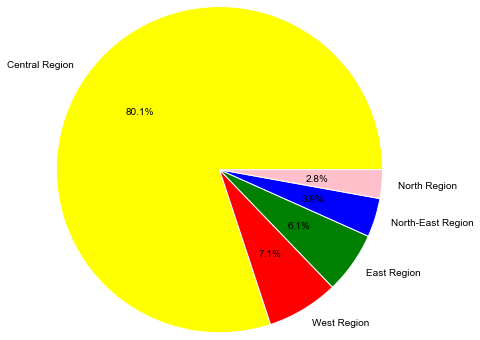

In [38]:
persentase = df1.neighbourhood_group.value_counts().values
nama = ['Central Region','West Region','East Region','North-East Region','North Region']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red','green','blue','pink'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1.5)
plt.show()

#### Rata-rata harga tiap Neighbourhood Group?

In [27]:
df1.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

neighbourhood_group
Central Region       184.498295
West Region          162.673704
East Region          151.939732
North-East Region    110.014184
North Region         102.644231
Name: price, dtype: float64

Text(0, 0.5, 'Price (SGD)')

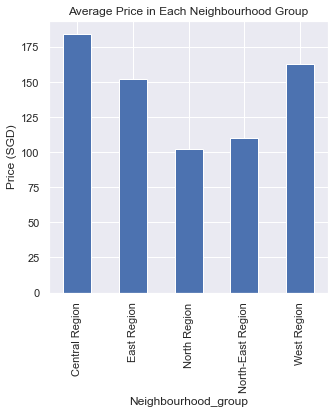

In [36]:
avg_price_per_nh_group = df.groupby(by=df['neighbourhood_group'])['price'].describe().round(1)

y = pd.DataFrame([avg_price_per_nh_group['count'], avg_price_per_nh_group['mean']]).T

sns.set(rc={'figure.figsize':(5,5)})
bar_avg_price_per_nh_group = y['mean'].plot(kind='bar')
bar_avg_price_per_nh_group.set_title('Average Price in Each Neighbourhood Group')
bar_avg_price_per_nh_group.set_xlabel('Neighbourhood_group')
bar_avg_price_per_nh_group.set_ylabel('Price (SGD)')

#### Rata-rata tingkat okupansi tiap Neighbourhood Group?

In [33]:
df1.groupby('neighbourhood_group')['occupancy_rate'].mean().sort_values(ascending=False)

neighbourhood_group
North-East Region    60.716021
West Region          53.633424
East Region          52.597236
North Region         44.877503
Central Region       44.868574
Name: occupancy_rate, dtype: float64

Text(0.5, 0, 'Neighbourhood_Group')

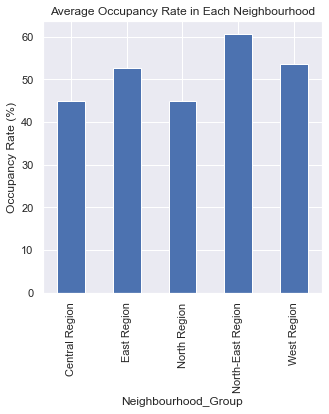

In [35]:
hasil_per_nh_group = df.groupby(by=df['neighbourhood_group'])['occupancy_rate'].describe().round(1)

rata_rata_occupancy_per_nh_group = hasil_per_nh_group['mean']

sns.set(rc={'figure.figsize':(5,5)})
bar_rata_rata_occupancy_per_nh_group = rata_rata_occupancy_per_nh_group.plot(kind='bar')
bar_rata_rata_occupancy_per_nh_group.set_title('Average Occupancy Rate in Each Neighbourhood')
bar_rata_rata_occupancy_per_nh_group.set_ylabel('Occupancy Rate (%)')
bar_rata_rata_occupancy_per_nh_group.set_xlabel('Neighbourhood_Group')

#### Rata-rata tingkat okupansi tiap Neighbourhood?

In [41]:
rata_rata_occupancy = df1.groupby(by=[df['neighbourhood_group'], df['neighbourhood']])['occupancy_rate'].mean().round(1)
rata_rata_occupancy.head()

neighbourhood_group  neighbourhood
Central Region       Bishan           57.6
                     Bukit Merah      51.7
                     Bukit Timah      53.3
                     Downtown Core    49.7
                     Geylang          43.8
Name: occupancy_rate, dtype: float64

Text(0, 0.5, 'Neighbourhood')

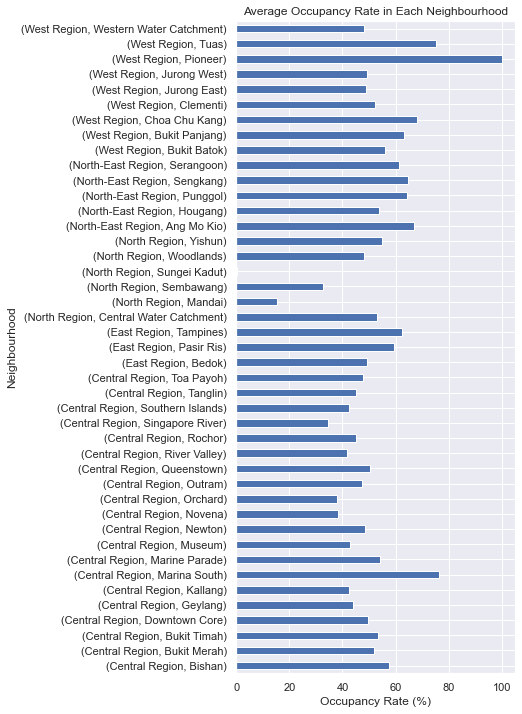

In [42]:
sns.set(rc={'figure.figsize':(5,12)})
bar_rata_rata_occupancy = rata_rata_occupancy.plot(kind='barh')
bar_rata_rata_occupancy.set_title('Average Occupancy Rate in Each Neighbourhood')
bar_rata_rata_occupancy.set_xlabel('Occupancy Rate (%)')
bar_rata_rata_occupancy.set_ylabel('Neighbourhood')

#### Korelasi harga kamar terhadap tingkat okupansi?

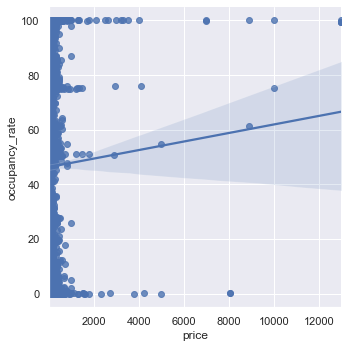

In [51]:
sns.lmplot(x = 'price', y = 'occupancy_rate', data=df1)

#### Perbandingan jumlah Airbnb Singapura dari tipe kamarnya? 

In [26]:
df1['room_type'].value_counts()

Entire home/apt    3469
Private room       3137
Hotel room          451
Shared room         266
Name: room_type, dtype: int64

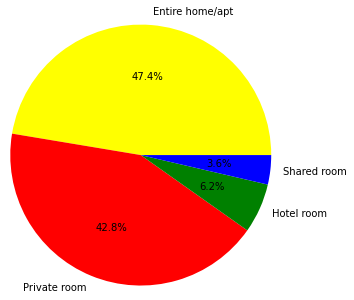

In [24]:
persentase = df1.room_type.value_counts().values
nama = ['Entire home/apt','Private room','Hotel room','Shared room']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red','green','blue','pink'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1.5)
plt.show()

#### Rata-rata harga tiap Room Type?

In [43]:
df1.groupby('room_type')['price'].mean().sort_values(ascending=False)

room_type
Entire home/apt    249.310176
Hotel room         152.441242
Private room       105.893210
Shared room         80.071429
Name: price, dtype: float64

#### Rata-rata harga tiap Room Type per Neighbourhood Group?

In [46]:
Room_type_mean = pd.crosstab(index=df1['neighbourhood_group'], columns=df1['room_type'], values=df1['price'], 
                             aggfunc='mean').round(1)
Room_type_mean

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Central Region,247.9,151.4,107.3,74.8
East Region,275.5,136.7,112.4,196.0
North Region,204.6,NaN,79.2,53.5
North-East Region,226.5,270.0,82.3,68.9
West Region,282.2,198.3,117.5,98.6


Text(0, 0.5, 'Price Mean')

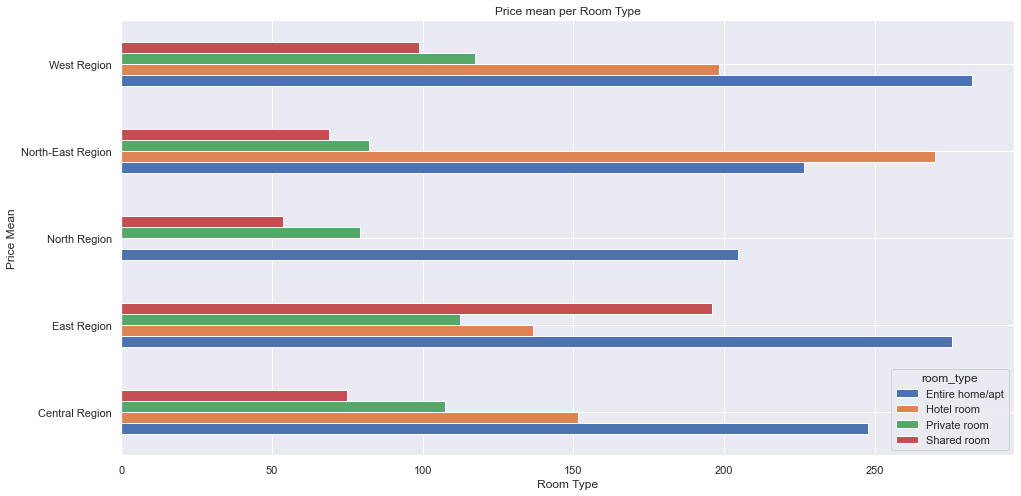

In [49]:
sns.set(rc={'figure.figsize':(16,8)})
Room_type_mean_bar = Room_type_mean.plot(kind='barh')
Room_type_mean_bar.set_title('Price mean per Room Type')
Room_type_mean_bar.set_xlabel('Room Type')
Room_type_mean_bar.set_ylabel('Price Mean')

#### Rata-rata tingkat okupansi tiap Room Type?

In [44]:
df1.groupby('room_type')['occupancy_rate'].mean().sort_values(ascending=False)

room_type
Private room       49.586596
Entire home/apt    45.240782
Shared room        42.564631
Hotel room         38.263220
Name: occupancy_rate, dtype: float64

#### Rata-rata tingkat okupansi tiap Room Type per Neighbourhood Group?

In [48]:
Room_type_mean_or = pd.crosstab(index=df1['neighbourhood_group'], columns=df1['room_type'], values=df1['occupancy_rate'], 
                             aggfunc='mean').round(1)
print(Room_type_mean_or)

room_type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood_group                                                        
Central Region                  44.1        39.0          47.7         41.1
East Region                     62.0         0.0          49.8         65.3
North Region                    44.7         NaN          45.1         43.4
North-East Region               62.4        10.8          60.6         72.0
West Region                     52.1         0.0          55.9         36.4


Text(0, 0.5, 'Occupancy Rate Percentage')

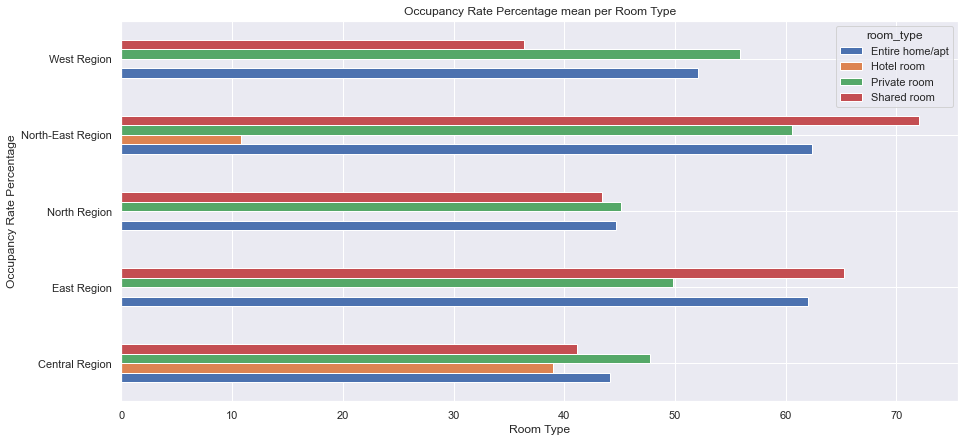

In [50]:
sns.set(rc={'figure.figsize':(15,7)})
Room_type_mean_or_bar = Room_type_mean_or.plot(kind='barh')
Room_type_mean_or_bar.set_title('Occupancy Rate Percentage mean per Room Type')
Room_type_mean_or_bar.set_xlabel('Room Type')
Room_type_mean_or_bar.set_ylabel('Occupancy Rate Percentage')